# Project - Titanic Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv('train.csv')

In [3]:
len(titanic_data)

668

In [4]:
# Taking a glimpse of the Data

titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [5]:
titanic_data.index

RangeIndex(start=0, stop=668, step=1)

In [6]:
titanic_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [8]:
titanic_data.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [9]:
titanic_data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


# Data Analysis

#### importing seaborn for visualizing the data

#### how many survived vs died using seaborn

<AxesSubplot:xlabel='Survived', ylabel='count'>

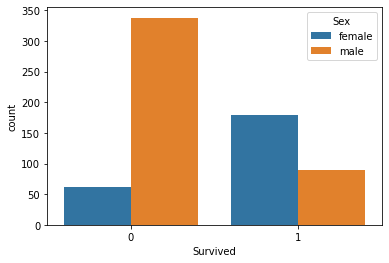

In [10]:
# count plot of survived vs not survived

sns.countplot(x='Survived',data = titanic_data,hue = 'Sex')

In [11]:
titanic_data.isna().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

<AxesSubplot:>

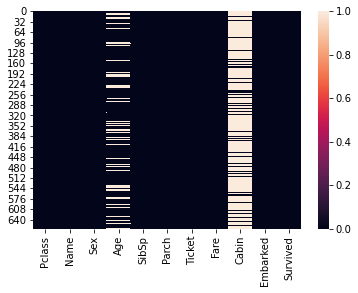

In [12]:
sns.heatmap(titanic_data.isna())

In [13]:
# % of null values in Age

titanic_data['Age'].isna().sum()/len(titanic_data['Age'])*100

19.760479041916167

In [14]:
# % of null values in Cabin

titanic_data['Cabin'].isna().sum()/len(titanic_data['Cabin'])*100

76.94610778443113

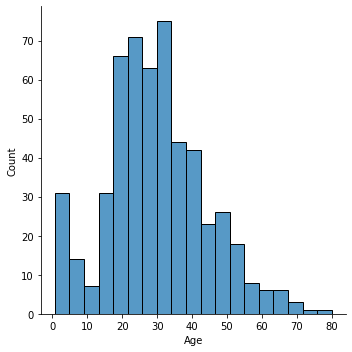

In [15]:
sns.displot(x='Age',data=titanic_data)

# Data Cleaning

In [16]:
# filling missing values of Age

In [17]:
age_mean = titanic_data['Age'].mean()

titanic_data['Age'].fillna(age_mean,inplace = True)

In [18]:
# Verifying

titanic_data['Age'].isna().sum()

0

<AxesSubplot:>

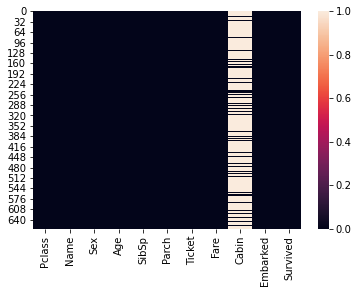

In [19]:
# visualizing the null values now

sns.heatmap(titanic_data.isna())

### As Cabin is of no use in our prediction we'll drop it

In [20]:
titanic_data.drop('Cabin',axis = 1, inplace = True)

In [21]:
titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00000,1,0,228414,26.000,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.70056,0,0,A/5 2466,8.050,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00000,0,0,250655,26.000,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00000,0,4,349909,21.075,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.050,S,0


### Now we will drop all the non numerical values and then see how our prediction is performing 

In [22]:
# checking all non numerical values

titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       668 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Embarked  667 non-null    object 
 9   Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 52.3+ KB


In [23]:
titanic_data.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Survived      int64
dtype: object

In [24]:
## Female = 0 
## Male = 1

In [25]:
def gender(string):
    if string == 'female':
        return 0
    else:
        return 1

In [26]:
titanic_data['Gender'] = titanic_data.Sex.apply(gender)

In [27]:
titanic_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Gender
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00000,1,0,228414,26.000,S,1,0
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.70056,0,0,A/5 2466,8.050,S,0,1
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00000,0,0,250655,26.000,S,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00000,0,4,349909,21.075,S,0,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.050,S,0,1


### Dropping Name, Sex, Ticket, Embarked as they'll not be helping us in predicting the survival

In [28]:
titanic_data.drop(['Sex','Name','Embarked','Ticket'], axis =1, inplace = True)

In [29]:
titanic_data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender
0,2,29.00000,1,0,26.000,1,0
1,3,29.70056,0,0,8.050,0,1
2,2,39.00000,0,0,26.000,0,1
3,3,29.00000,0,4,21.075,0,0
4,3,25.00000,0,0,7.050,0,1


In [30]:
# Seperating dependent and independent variables

x = titanic_data[['Pclass','Age','SibSp','Parch','Fare','Gender']]
y = titanic_data['Survived']

# Data Modelling



### Building Model Using Logistic Regression

In [31]:
from sklearn import model_selection

In [32]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.33, random_state = 42)

In [33]:
# import logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# fit logistic regression

In [36]:
alg = LogisticRegression()

In [37]:
alg.fit(x_train,y_train)

LogisticRegression()

In [38]:
# Predicting 

In [39]:
predict = alg.predict(x_test)

# Testing


model performance

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
pd.DataFrame(confusion_matrix(y_test,predict), columns = ['Predicted No', 'Predicted Yes'], index = ['True No','True Yes'])

,Predicted No,Predicted Yes
True No,103,21
True Yes,28,69


In [42]:
# finding the accuracy by importing classification report

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       124
           1       0.77      0.71      0.74        97

    accuracy                           0.78       221
   macro avg       0.78      0.77      0.77       221
weighted avg       0.78      0.78      0.78       221



## Now importing the test file to do predict the survival of passengers

In [45]:
titanic_data2 = pd.read_csv('test.csv')

In [46]:
test_data = titanic_data2.copy()

In [47]:
titanic_data2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


### using the analysis that we already did on the training file and then applying that on the testing file

In [48]:
titanic_data2.isna().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

<AxesSubplot:>

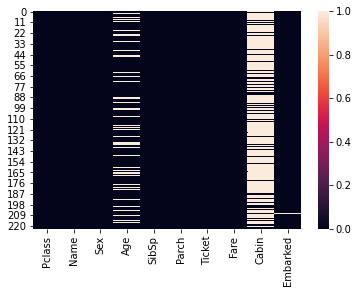

In [49]:
sns.heatmap(titanic_data2.isna())

In [50]:
## Data cleaning

In [51]:
age_mean = titanic_data2['Age'].mean()

titanic_data2['Age'].fillna(age_mean,inplace = True)

In [52]:
titanic_data2.drop('Cabin',axis = 1, inplace = True)

In [53]:
titanic_data2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.000000,1,1,C.A. 33112,36.7500,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S
2,3,"Kilgannon, Mr. Thomas J",male,29.694775,0,0,36865,7.7375,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.000000,2,1,243847,27.0000,S
4,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,S


In [54]:
def gender(string):
    if string == 'female':
        return 0
    else:
        return 1

In [55]:
titanic_data2['Gender'] = titanic_data2.Sex.apply(gender)

In [56]:
titanic_data2.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,2,"Davies, Master. John Morgan Jr",male,8.000000,1,1,C.A. 33112,36.7500,S,1
1,1,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S,0
2,3,"Kilgannon, Mr. Thomas J",male,29.694775,0,0,36865,7.7375,Q,1
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.000000,2,1,243847,27.0000,S,0
4,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,S,1


In [57]:
titanic_data2.drop(['Sex','Name','Embarked','Ticket'], axis =1, inplace = True)

In [58]:
titanic_data2.head()

,Pclass,Age,SibSp,Parch,Fare,Gender
0,2,8.000000,1,1,36.7500,1
1,1,49.000000,0,0,25.9292,0
2,3,29.694775,0,0,7.7375,1
3,2,24.000000,2,1,27.0000,0
4,1,36.000000,0,0,26.2875,1


In [59]:
X = titanic_data2[['Pclass','Age','SibSp','Parch','Fare','Gender']]

# Data Modelling on testing data

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
predict_for_test = alg.predict(X)

In [62]:
pd.DataFrame(predict_for_test, columns = ['Survived'])

,Survived
0,0
1,1
2,0
3,1
4,0
...,...
218,0
219,0
220,1
221,0


In [63]:
def integervals(zeroone):
    if zeroone == 0:
        return 'No'
    else:
        return 'Yes'

In [64]:
titanic_data2['Survived'] = predict_for_test

In [65]:
titanic_data2['Survived(yes or no)'] = titanic_data2.Survived.apply(integervals)

In [66]:
titanic_data2.head()

,Pclass,Age,SibSp,Parch,Fare,Gender,Survived,Survived(yes or no)
0,2,8.000000,1,1,36.7500,1,0,No
1,1,49.000000,0,0,25.9292,0,1,Yes
2,3,29.694775,0,0,7.7375,1,0,No
3,2,24.000000,2,1,27.0000,0,1,Yes
4,1,36.000000,0,0,26.2875,1,0,No


In [68]:
test_data['Survived'] = titanic_data2['Survived(yes or no)']

In [69]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,No
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Yes
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,No
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,Yes
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S,No


## Bar Graph for Predicted Survival w.r.t gender


<AxesSubplot:xlabel='Survived', ylabel='count'>

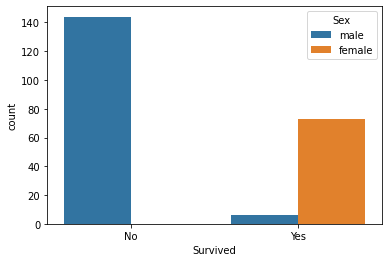

In [71]:
sns.countplot(x='Survived',data = test_data ,hue = 'Sex')

# Saving DataFrame to_csv file format 

In [72]:
test_data.to_csv('Test_Prediction.csv', index=False)